# TASK 3 : NLP 
### Submission To MIDAS LAB
File Name : Step2-Handling_Labels 
<br>
@Author : Vansh Gupta
<br>
Objective : We'll be dealing with labels(majorly level1) in this notebook, as the name implies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\data\Processed_data.csv")

In [3]:
df.head()

,product_category_tree,description,cat_level1,cat_level2,cat_level3,cat_level4,cat_level5,cat_level6
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing,Women's Clothing,Lingerie Sleep & Swimwear,Shorts,Alisha Shorts,NaN
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture,Living Room Furniture,Sofa Beds & Futons,NaN,NaN,NaN
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Women's Footwear,Ballerinas,NaN,NaN,NaN
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing,Women's Clothing,Lingerie Sleep & Swimwear,Shorts,Alisha Shorts,NaN
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,NaN,NaN


Since our task is to find primary category, we'll be looking into cat_level1. We'll talk about other category level later.

In [4]:
df.cat_level1.unique()

array(['Clothing ', 'Furniture ', 'Footwear ', 'Pet Supplies ',
       'Eternal Gandhi Super Series Crystal Paper Weight...',
       'Pens & Stationery ', 'Sports & Fitness ',
       'Beauty and Personal Care ',
       'Bengal Blooms Rose Artificial Plant  with Pot (3...',
       'Bags Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ',
       "Vishudh Printed Women's Straight Kurta",
       "Vishudh Printed Women's Anarkali Kurta",
       'BuildTrack PIR Wireless Motion Sensor - One Swit...',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER...',
       "MASARA Solid Women's Straight Kurta",
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER...',
       'Behringer Xenyx 502 Analog Sound Mixer',
       "Noor Embroidered Women's Straight Kurta",
       "Libas Printed Women's A-line Kurta",
       "Libas Printed Women's Anarkali Kurta", 'Home Furnishing ',
       'Baby Care ', 'Mobiles & Accessories ', 'Food & Nutrition ',
       'Wat

In [5]:
cat = dict(df.cat_level1.value_counts())

In [7]:
print(len(cat))

266


Currently, we have 266 category in level 1. 
<br>
Let's see if we can merge some categories or remove them based on its population 

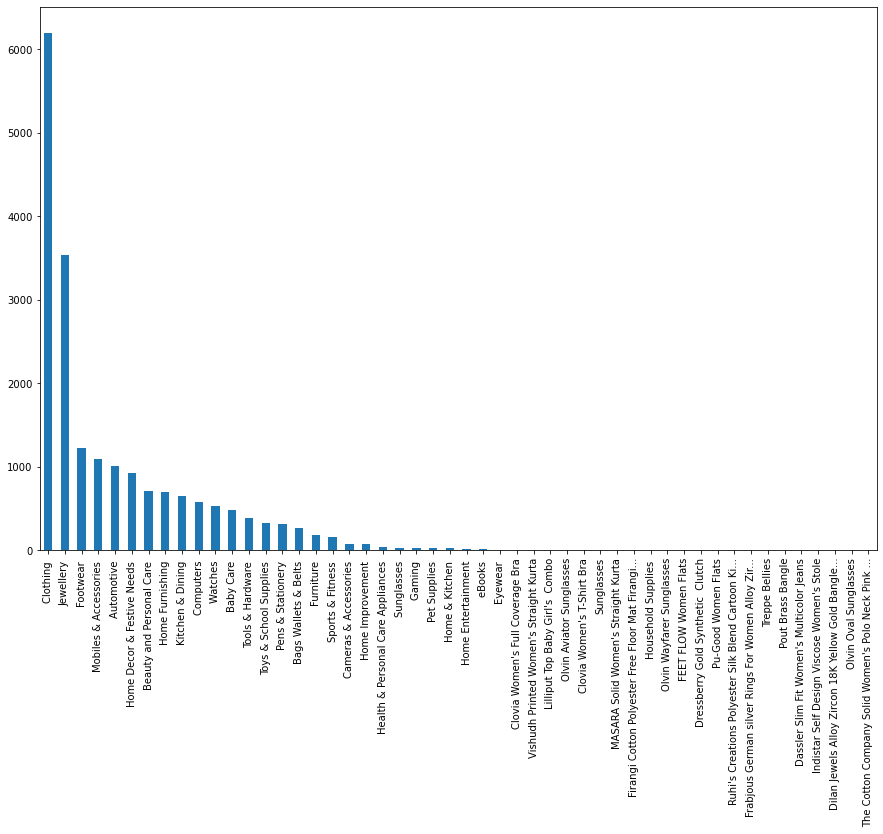

In [7]:
plt.figure(figsize=(15, 10))
df.cat_level1.value_counts().nlargest(n=50).plot.bar()
plt.show()

Many groups have very less(nearly 1) data points, as we can see. These categories serve as an outliner. Because the number is so high. It's difficult to combine. As a result, dropping them is the best option.

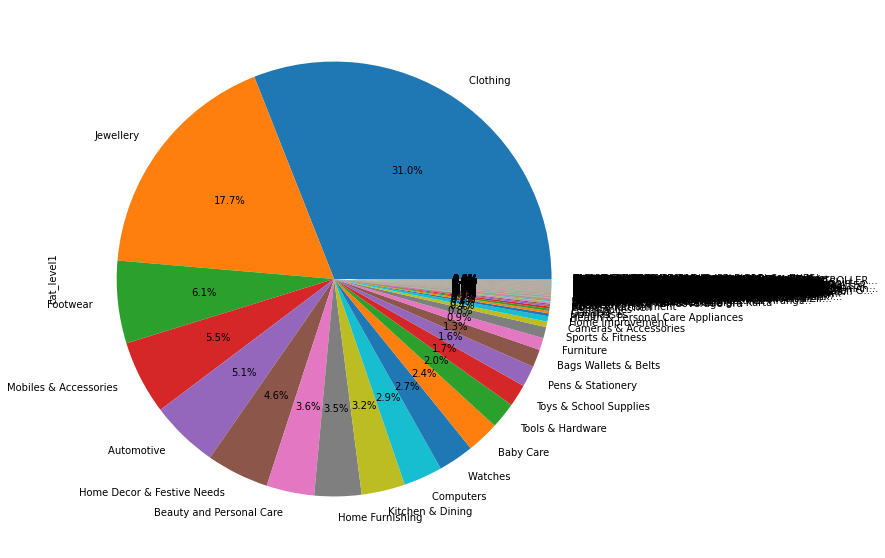

In [8]:
plt.figure(figsize=(15, 10))
df.cat_level1.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [9]:
useless_cat = [key for key in cat if cat[key] < 10]

In [10]:
df = df[~df.isin(useless_cat)]

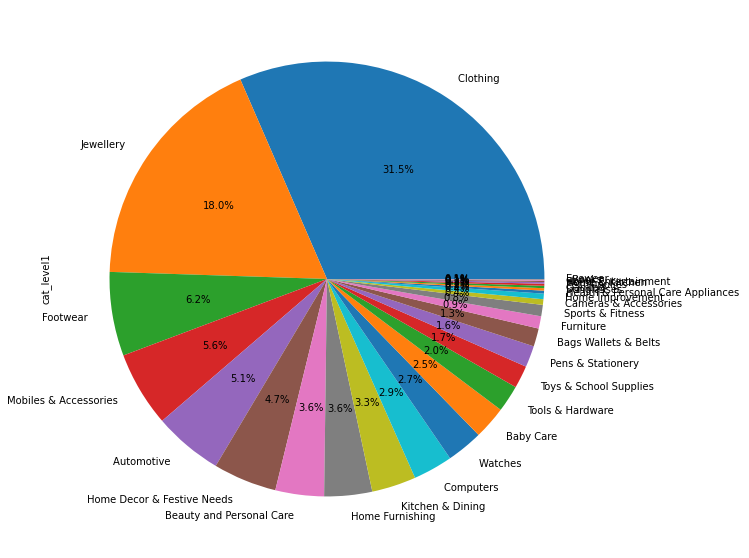

In [11]:
plt.figure(figsize=(15, 10))
df.cat_level1.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Pie chart looks better now

In [12]:
df.cat_level1.value_counts()

Clothing                              6197
Jewellery                             3531
Footwear                              1227
Mobiles & Accessories                 1099
Automotive                            1012
Home Decor & Festive Needs             929
Beauty and Personal Care               710
Home Furnishing                        699
Kitchen & Dining                       647
Computers                              578
Watches                                530
Baby Care                              483
Tools & Hardware                       391
Toys & School Supplies                 330
Pens & Stationery                      313
Bags Wallets & Belts                   265
Furniture                              180
Sports & Fitness                       166
Cameras & Accessories                   82
Home Improvement                        81
Health & Personal Care Appliances       43
Sunglasses                              35
Gaming                                  35
Pet Supplie

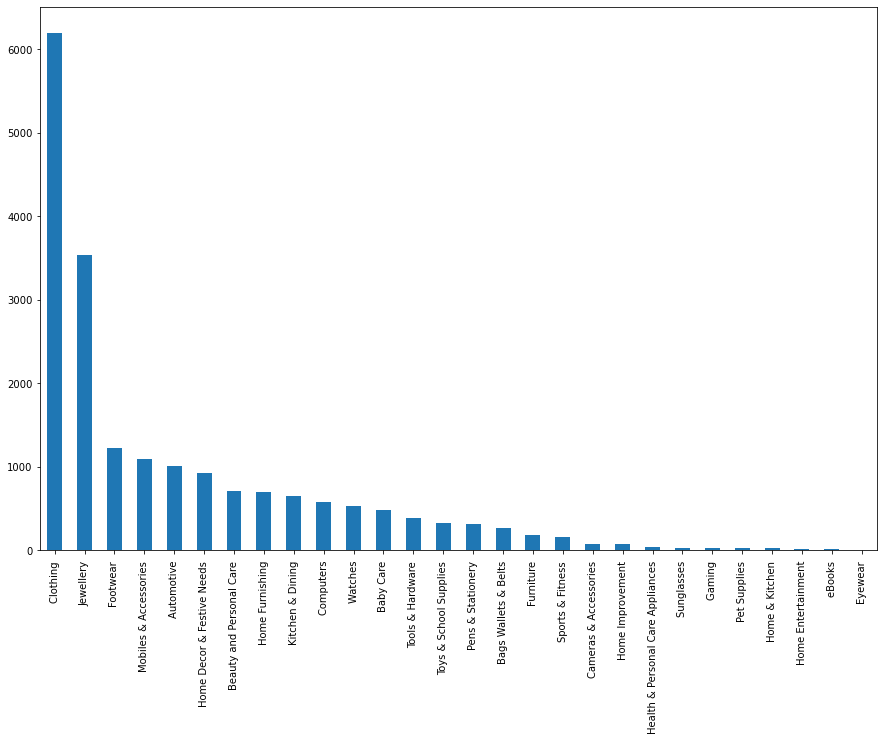

In [13]:
plt.figure(figsize=(15, 10))
df.cat_level1.value_counts().plot.bar()
plt.show()

In [14]:
df.to_csv("../Data/Done_with_Labels.csv", index=False)

# Continued in step3